# Predicciones

In [ ]:
import numpy as np 
import pandas as pd

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns
# import dtreeviz.trees as dtreeviz

#modelos y métricas
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score#, precision_recall_curve, roc_curve,
from sklearn.metrics import confusion_matrix, classification_report
#preprocesamiento
from sklearn.preprocessing import MinMaxScaler

#Importamos los datasets

dataset_hotels_test = pd.read_csv('https://github.com/joeldevel/data_tp1_odd/blob/main/hotels_test.csv?raw=true')
dataset_hotels_train = pd.read_csv('https://github.com/joeldevel/data_tp1_odd/blob/main/hotels_train.csv?raw=true')

In [ ]:
dataset_hotels_train.drop(['reservation_status_date'], axis='columns', inplace=True) 
dataset_hotels_test.drop(['reservation_status_date'], axis='columns', inplace=True) 

# Preprocesamiento

In [ ]:
dataset_hotels_test_id = dataset_hotels_test['id'].copy()

In [ ]:
dataset_hotels_train['agent'] = dataset_hotels_train['agent'].fillna(0).astype('int').astype('str')
dataset_hotels_test['agent'] = dataset_hotels_test['agent'].fillna(0).astype('int').astype('str')

In [ ]:
dataset_hotels_train.drop(['meal', 'is_repeated_guest','stays_in_weekend_nights','arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month','id','previous_bookings_not_canceled'], axis='columns', inplace=True)

In [ ]:
dataset_hotels_test.drop(['meal', 'is_repeated_guest','stays_in_weekend_nights','arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month','id','previous_bookings_not_canceled'], axis='columns', inplace=True)

In [ ]:
dataset_hotels_train['cant_personas'] = dataset_hotels_train['children'].fillna(0) + dataset_hotels_train['adults'].fillna(0) + dataset_hotels_train['babies'].fillna(0)
dataset_hotels_train.drop(['children', 'adults','babies'], axis='columns', inplace=True) 

In [ ]:
dataset_hotels_test['cant_personas'] = dataset_hotels_test['children'].fillna(0) + dataset_hotels_test['adults'].fillna(0) + dataset_hotels_test['babies'].fillna(0)
dataset_hotels_test.drop(['children', 'adults','babies'], axis='columns', inplace=True) 

In [ ]:
dataset_hotels_train['company'] = dataset_hotels_train['company'].fillna('ninguno')

In [ ]:
dataset_hotels_test['company'] = dataset_hotels_test['company'].fillna('ninguno')

In [ ]:
dataset_hotels_train['agent'] = dataset_hotels_train['agent'].fillna('desconocida')

In [ ]:
dataset_hotels_test['agent'] = dataset_hotels_test['agent'].fillna('desconocida')

In [ ]:
dataset_hotels_train.dtypes

hotel                           object
lead_time                        int64
stays_in_week_nights             int64
country                         object
market_segment                  object
distribution_channel            object
previous_cancellations           int64
reserved_room_type              object
assigned_room_type              object
booking_changes                  int64
deposit_type                    object
agent                           object
company                         object
days_in_waiting_list             int64
customer_type                   object
adr                            float64
required_car_parking_spaces      int64
total_of_special_requests        int64
is_canceled                      int64
cant_personas                  float64
dtype: object

In [ ]:
dataset_hotels_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        61913 non-null  object 
 1   lead_time                    61913 non-null  int64  
 2   stays_in_week_nights         61913 non-null  int64  
 3   country                      61692 non-null  object 
 4   market_segment               61913 non-null  object 
 5   distribution_channel         61913 non-null  object 
 6   previous_cancellations       61913 non-null  int64  
 7   reserved_room_type           61913 non-null  object 
 8   assigned_room_type           61913 non-null  object 
 9   booking_changes              61913 non-null  int64  
 10  deposit_type                 61913 non-null  object 
 11  agent                        61913 non-null  object 
 12  company                      61913 non-null  object 
 13  days_in_waiting_

Generamos One hot Encodig para la variable hotel

In [ ]:
dataset_hotels_train = pd.concat([dataset_hotels_train, pd.get_dummies(dataset_hotels_train['hotel'], drop_first=True )], axis=1)
dataset_hotels_train.drop(['hotel'], axis='columns', inplace=True) 

In [ ]:
dataset_hotels_test = pd.concat([dataset_hotels_test, pd.get_dummies(dataset_hotels_test['hotel'], drop_first=True )], axis=1)
dataset_hotels_test.drop(['hotel'], axis='columns', inplace=True) 

Genero One hot Encodig para la variable market_segment

---



In [ ]:
lista_market_segment_mayoritarios = dataset_hotels_train['market_segment'].value_counts().nlargest(5).index.tolist()
lista_market_segment_mayoritarios

['Online TA', 'Offline TA/TO', 'Groups', 'Direct', 'Corporate']

In [ ]:
dataset_hotels_train['market_segment'] = pd.Series(np.where(~dataset_hotels_train['market_segment'].isin(lista_market_segment_mayoritarios), 'otro market', dataset_hotels_train['market_segment']))
dataset_hotels_train = pd.concat([dataset_hotels_train, pd.get_dummies(dataset_hotels_train['market_segment'], drop_first=True )], axis=1)
dataset_hotels_train.drop(['market_segment'], axis='columns', inplace=True)

In [ ]:
dataset_hotels_test['market_segment'] = pd.Series(np.where(~dataset_hotels_test['market_segment'].isin(lista_market_segment_mayoritarios), 'otro market', dataset_hotels_test['market_segment']))
dataset_hotels_test = pd.concat([dataset_hotels_test, pd.get_dummies(dataset_hotels_test['market_segment'], drop_first=True )], axis=1)
dataset_hotels_test.drop(['market_segment'], axis='columns', inplace=True)

*Genero* One hot Encodig para la variable distribution_channel

In [ ]:
dataset_hotels_train['distribution_channel']= dataset_hotels_train['distribution_channel'].replace('Direct','direct_channel')
dataset_hotels_test['distribution_channel']= dataset_hotels_test['distribution_channel'].replace('Direct','direct_channel')

In [ ]:
lista_distribution_channel_mayoritarios = dataset_hotels_train['distribution_channel'].value_counts().nlargest(3).index.tolist()
lista_distribution_channel_mayoritarios

['TA/TO', 'direct_channel', 'Corporate']

In [ ]:
dataset_hotels_train['distribution_channel'] = pd.Series(np.where(~dataset_hotels_train['distribution_channel'].isin(lista_distribution_channel_mayoritarios), 'otro distribution channel', dataset_hotels_train['distribution_channel']))
dataset_hotels_train = pd.concat([dataset_hotels_train, pd.get_dummies(dataset_hotels_train['distribution_channel'], drop_first=True )], axis=1)
dataset_hotels_train.drop(['distribution_channel'], axis='columns', inplace=True)

In [ ]:
dataset_hotels_test['distribution_channel'] = pd.Series(np.where(~dataset_hotels_test['distribution_channel'].isin(lista_distribution_channel_mayoritarios), 'otro distribution channel', dataset_hotels_test['distribution_channel']))
dataset_hotels_test = pd.concat([dataset_hotels_test, pd.get_dummies(dataset_hotels_test['distribution_channel'], drop_first=True )], axis=1)
dataset_hotels_test.drop(['distribution_channel'], axis='columns', inplace=True)

Genero One hot Encodig para la variable reserved_room_type



In [ ]:
dataset_hotels_train['reserved_room_type']

0        D
1        A
2        F
3        A
4        A
        ..
61908    A
61909    A
61910    A
61911    A
61912    D
Name: reserved_room_type, Length: 61913, dtype: object

Genero One hot Encodig para la variable assigned_room_type

In [ ]:
dataset_hotels_train = pd.concat([dataset_hotels_train, pd.get_dummies(dataset_hotels_train['assigned_room_type'], drop_first=True )], axis=1)
dataset_hotels_train.drop(['assigned_room_type'], axis='columns', inplace=True) 

In [ ]:
dataset_hotels_test = pd.concat([dataset_hotels_test, pd.get_dummies(dataset_hotels_test['assigned_room_type'], drop_first=True )], axis=1)
dataset_hotels_test.drop(['assigned_room_type'], axis='columns', inplace=True) 

Genero One hot Encodig para la variable deposit_type

In [ ]:
dataset_hotels_train = pd.concat([dataset_hotels_train, pd.get_dummies(dataset_hotels_train['deposit_type'], drop_first=True )], axis=1)
dataset_hotels_train.drop(['deposit_type'], axis='columns', inplace=True) 

In [ ]:
dataset_hotels_test = pd.concat([dataset_hotels_test, pd.get_dummies(dataset_hotels_test['deposit_type'], drop_first=True )], axis=1)
dataset_hotels_test.drop(['deposit_type'], axis='columns', inplace=True) 

Genero One hot Encodig para la variable customer_type

In [ ]:
dataset_hotels_train = pd.concat([dataset_hotels_train, pd.get_dummies(dataset_hotels_train['customer_type'], drop_first=True )], axis=1)
dataset_hotels_train.drop(['customer_type'], axis='columns', inplace=True) 

In [ ]:
dataset_hotels_test = pd.concat([dataset_hotels_test, pd.get_dummies(dataset_hotels_test['customer_type'], drop_first=True )], axis=1)
dataset_hotels_test.drop(['customer_type'], axis='columns', inplace=True) 

Genero One hot Encodig para la variable agent

In [ ]:
lista_agent_mayoritarios = dataset_hotels_train['agent'].value_counts().nlargest(9).index.tolist()
lista_agent_mayoritarios

['9', '0', '240', '1', '14', '6', '7', '250', '241']

In [ ]:
dataset_hotels_train['agent'] = pd.Series(np.where(~dataset_hotels_train['agent'].isin(lista_agent_mayoritarios), 'otra agencia', dataset_hotels_train['agent']))
dataset_hotels_train = pd.concat([dataset_hotels_train, pd.get_dummies(dataset_hotels_train['agent'], drop_first=True )], axis=1)
dataset_hotels_train.drop(['agent'], axis='columns', inplace=True) 

In [ ]:
dataset_hotels_test['agent'] = pd.Series(np.where(~dataset_hotels_test['agent'].isin(lista_agent_mayoritarios), 'otra agencia', dataset_hotels_test['agent']))
dataset_hotels_test = pd.concat([dataset_hotels_test, pd.get_dummies(dataset_hotels_test['agent'], drop_first=True )], axis=1)
dataset_hotels_test.drop(['agent'], axis='columns', inplace=True) 

Genero One hot Encodig para la variable company

<Axes: >

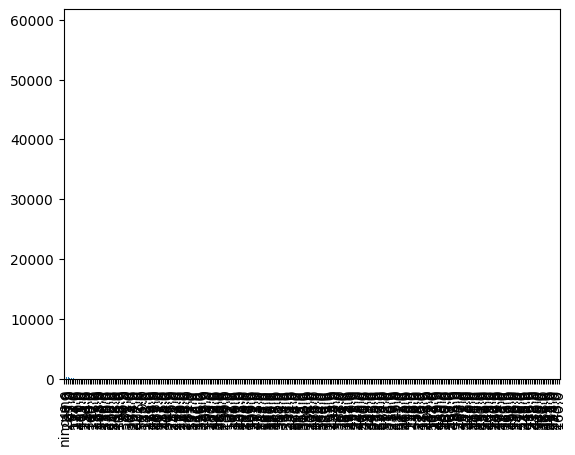

In [ ]:
dataset_hotels_train['company'].value_counts().plot(kind = 'bar')

In [ ]:
lista_company_mayoritarios = dataset_hotels_train['company'].value_counts().nlargest(1).index.tolist()
lista_company_mayoritarios

['ninguno']

In [ ]:
dataset_hotels_train['company'] = pd.Series(np.where(~dataset_hotels_train['company'].isin(lista_company_mayoritarios), 'con compay', dataset_hotels_train['company']))
dataset_hotels_train = pd.concat([dataset_hotels_train, pd.get_dummies(dataset_hotels_train['company'], drop_first=True )], axis=1)
dataset_hotels_train.drop(['company'], axis='columns', inplace=True) 

In [ ]:
dataset_hotels_test['company'] = pd.Series(np.where(~dataset_hotels_test['company'].isin(lista_company_mayoritarios), 'con compay', dataset_hotels_test['company']))
dataset_hotels_test = pd.concat([dataset_hotels_test, pd.get_dummies(dataset_hotels_test['company'], drop_first=True )], axis=1)
dataset_hotels_test.drop(['company'], axis='columns', inplace=True) 

Genero One hot encoding para la variable Country, como son muchos paises y para no saturar de dimensiones los datos agrupo los paises minoritarios en una nueva categoria

<Axes: >

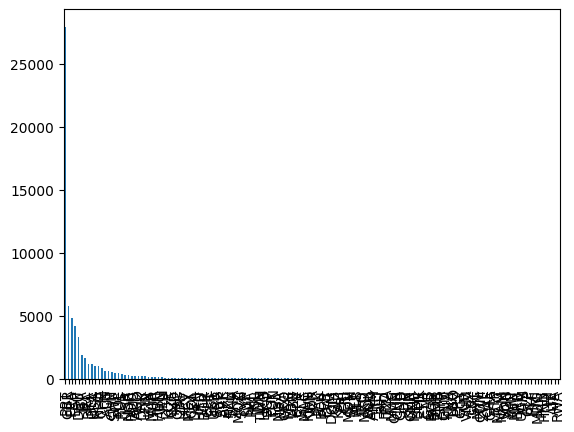

In [ ]:
dataset_hotels_train['country'].value_counts().plot(kind = 'bar')

In [ ]:
lista_paises_mayoritarios = dataset_hotels_train['country'].value_counts().nlargest(10).index.tolist()
lista_paises_mayoritarios

['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BRA', 'BEL', 'USA']

In [ ]:
dataset_hotels_train['country'] = pd.Series(np.where(~dataset_hotels_train['country'].isin(lista_paises_mayoritarios), 'Otro Pais', dataset_hotels_train['country']))
dataset_hotels_train = pd.concat([dataset_hotels_train, pd.get_dummies(dataset_hotels_train['country'], drop_first=True )], axis=1)
dataset_hotels_train.drop(['country'], axis='columns', inplace=True) 

In [ ]:
dataset_hotels_test['country'] = pd.Series(np.where(~dataset_hotels_test['country'].isin(lista_paises_mayoritarios), 'Otro Pais', dataset_hotels_test['country']))
dataset_hotels_test = pd.concat([dataset_hotels_test, pd.get_dummies(dataset_hotels_test['country'], drop_first=True )], axis=1)
dataset_hotels_test.drop(['country'], axis='columns', inplace=True) 

In [ ]:
list_columns = dataset_hotels_test.columns.to_list()

In [ ]:
dataset_hotels_test.columns.symmetric_difference(dataset_hotels_train.columns)

Index(['L', 'is_canceled'], dtype='object')

In [ ]:
dataset_hotels_test['L'] = np.uint8(0)

In [ ]:
dataset_hotels_train.columns.symmetric_difference(dataset_hotels_test.columns)

Index(['is_canceled'], dtype='object')

In [ ]:
dataset_hotels_train = dataset_hotels_train.reindex(sorted(dataset_hotels_train.columns), axis=1)
dataset_hotels_test = dataset_hotels_test.reindex(sorted(dataset_hotels_test.columns), axis=1)

# PREPROCESAMIENTO HECHO

In [ ]:
import numpy as np 
import pandas as pd
from collections import defaultdict

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV

from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


#configuración warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [ ]:
ds_hotels_y = dataset_hotels_train['is_canceled'].copy()

# Solo deja las columnas numericas
dataset_hotels_train = dataset_hotels_train.select_dtypes(include='number')
dataset_hotels_test = dataset_hotels_test.select_dtypes(include='number')

# Agarra el resto
ds_hotels_x = dataset_hotels_train.drop(['is_canceled'], axis='columns', inplace=False) 

x_train, x_test, y_train, y_test = train_test_split(ds_hotels_x,
                                                    ds_hotels_y, 
                                                    test_size=0.3,  #proporcion 70/30
                                                    random_state=2) #semilla


In [ ]:
rfc_default = RandomForestClassifier()

In [ ]:
##KFOLD CV Random Search para buscar el mejor arbol (los mejores atributos, hiperparametros,etc)
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer
import sklearn as sk
                
# Hiperparametros sacados del RF del ejercicio anterior
rfc = RandomForestClassifier(max_features='auto', 
                             oob_score=True, 
                             random_state=2, 
                             n_jobs=-1,
                             criterion="gini", 
                             min_samples_leaf=6,
                             min_samples_split=2,
                             max_depth=25,
                             n_estimators=5, verbose=1)

knn = KNeighborsClassifier(  weights= 'distance',
                             n_neighbors= 6,
                             metric= 'manhattan',
                             algorithm= 'brute')

## Stacking


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV

#Modelos Base
base_models = [('random_forest', rfc),
               ('knn', knn)]

#Ensemble Stacking
stacking_model = StackingClassifier(estimators=base_models, 
                                    final_estimator=LogisticRegressionCV(), 
                                    passthrough=True, 
                                    cv=5,
                                    verbose=10)

In [ ]:
stacking_model.fit(x_train,y_train)
y_pred_st = stacking_model.predict(x_test)
accuracy_score(y_test, y_pred_st)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-

0.854689350705287

In [ ]:
#Realizamos una predicción sobre el set de test
y_pred = stacking_model.predict(x_test)
#Valores Predichos
y_pred

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


array([1, 1, 1, ..., 0, 1, 1])

In [ ]:
from joblib import dump, load
dump(stacking_model, 'stacking_model.joblib')

['stacking_model.joblib']

F1-Score: 0.8554287856875034


Text(50.722222222222214, 0.5, 'True')

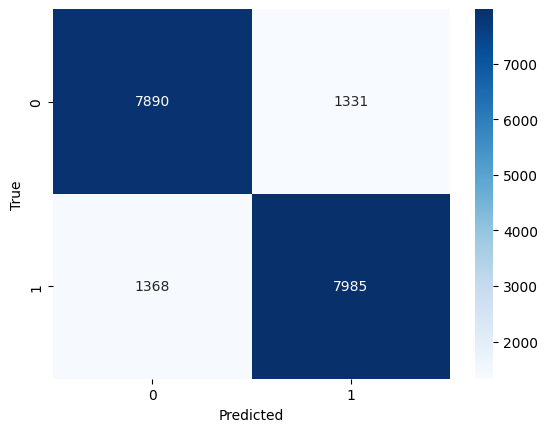

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report , f1_score
print('F1-Score: {}'.format(f1_score(y_test, y_pred, average='binary'))) #binary considera la clase positiva por defecto 1

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
# Calculo las métricas en el conjunto de evaluación
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

print("Accuracy: "+str(accuracy))
print("Recall: "+str(recall))
print("f1 score: "+str(f1))

Accuracy: 0.854689350705287
Recall: 0.8537367689511387
f1 score: 0.8554287856875034


In [ ]:
y_pred_test = stacking_model.predict(dataset_hotels_test)
y_pred_test

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


array([1, 1, 0, ..., 1, 1, 0])

In [ ]:
df_prediction_stacking = pd.DataFrame(zip(dataset_hotels_test_id,y_pred_test)).rename(columns={0: "id", 1: "is_canceled"})
df_prediction_stacking.to_csv('stacking_prediction.csv', index=False)

## Voting

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
#Creo ensemble de Votación
voting_clfr = VotingClassifier(estimators = [('rnd', rfc), ('knn', knn)], voting = 'hard')

In [ ]:
voting_clfr.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished


VotingClassifier(estimators=[('rnd',
                              RandomForestClassifier(max_depth=25,
                                                     max_features='auto',
                                                     min_samples_leaf=6,
                                                     n_estimators=5, n_jobs=-1,
                                                     oob_score=True,
                                                     random_state=2,
                                                     verbose=1)),
                             ('knn',
                              KNeighborsClassifier(algorithm='brute',
                                                   metric='manhattan',
                                                   n_neighbors=6,
                                                   weights='distance'))])

In [ ]:
pred = voting_clfr.predict(x_test)
accuracy_score(y_test, pred)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


0.8241628082265533

In [ ]:
from joblib import dump, load
dump(voting_clfr, 'voting_clfr.joblib')

['voting_clfr.joblib']

F1-Score: 0.8099837095648127


Text(50.722222222222214, 0.5, 'True')

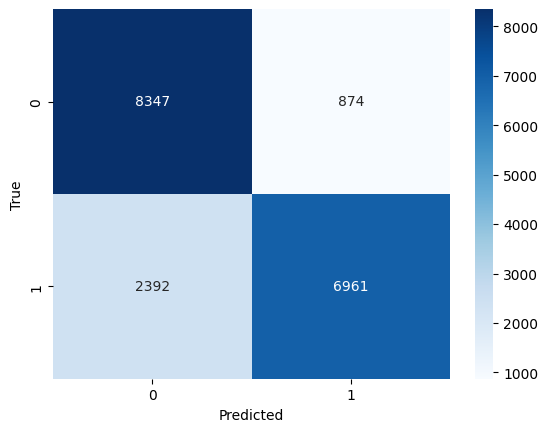

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report , f1_score
print('F1-Score: {}'.format(f1_score(y_test, pred, average='binary'))) #binary considera la clase positiva por defecto 1

cm = confusion_matrix(y_test,pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
pred_test = voting_clfr.predict(dataset_hotels_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


In [ ]:
y_pred_voting = voting_clfr.predict(dataset_hotels_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


In [ ]:
df_prediction_voting = pd.DataFrame(zip(dataset_hotels_test_id,y_pred_voting)).rename(columns={0: "id", 1: "is_canceled"})
df_prediction_voting.to_csv('voting_prediction.csv', index=False)

In [ ]:
dataset_hotels_test.to_csv('voting_test_processed.csv', index=False)
dataset_hotels_train.to_csv('voting_train_processed.csv', index=False)